In [1]:
import matplotlib.pyplot as plt
import numpy as np
import OOPAO
import tomoAO




     °          *      *      
 ▄██▄   ▄██▄  ▄███▄   ▄██▄ * ▄██▄ 
██* ██ ██  ██ ██  ██ ██  ██ ██  ██
██  ██ ██° ██ ██  ██ ██* ██ ██  ██
██  ██ ██  ██ ████▀  ██▄▄██ ██  ██
██* ██ ██  ██ ██     ██▀▀██ ██  ██
██  ██ ██  ██ ██ *   ██  ██ ██* ██
 ▀██▀   ▀██▀  ██   ° ██  ██  ▀██▀ 
      *         *             




In [2]:
config_dir = "./"
config_file = "config.ini"

ao_mode = "MLAO"

config_vars = tomoAO.IO.load_from_ini(config_file, ao_mode=ao_mode,config_dir=config_dir)

## Asterism Object

By default, the OPD for each source is initialized as a zero array with shape (100, 100). This leads to issues when the initial propagation does not involve the atmosphere. A solution for this case still needs to be determined.

In [3]:
from OOPAO.Source import Source
from OOPAO.Asterism import Asterism

optBand = config_vars["lgs_opticalBand"]
magnitude = config_vars["lgs_magnitude"]
lgs_zenith = config_vars["lgs_zenith"]
lgs_azimuth = config_vars["lgs_azimuth"]
lgs_altitude = config_vars["lgs_altitude"]

n_lgs = config_vars["n_lgs"]


# fwhm_spot = 0.1 # arcsec

# # Na Profile
# n = 11 # sampling of the Na Profile
# Na_profile = np.zeros([2,n])
# Na_profile[0,:] = np.linspace(80000,100000,n) # altitude in m of the Na layer
# Na_profile[1,:] = 1/n # Na density profile, here considered to be uniform

# theta = np.linspace(0,360, n_lgs,endpoint=False) #deg

# zenith = config_vars["lgs_zenith"][0]

# lgsAst = Asterism([Source(optBand=optBand,
#                   magnitude=magnitude,
#                   laser_coordinates=[np.cos(np.deg2rad(i_theta))*13.5/2,np.sin(np.deg2rad(i_theta))*13.5/2], 
#                   Na_profile=Na_profile,
#                   FWHM_spot_up= fwhm_spot,
#                   coordinates = [zenith,i_theta])
#                   for i_theta in theta])



lgsAst = Asterism([Source(optBand=optBand,
              magnitude=magnitude,
              coordinates=[lgs_zenith[kLgs], lgs_azimuth[kLgs]],
            altitude=lgs_altitude)
          for kLgs in range(n_lgs)])



------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  0.00   
Altitude [m]             |90000.00 
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              |  90.00  
Altitude [m]             |90000.00 
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [10,90]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  10.00  
Azimuth [°]              | 180.00  
Altitude [m]             |90000.00 
Magnitude                |  0.00   
Flux [photon/m²/s]       |

In [4]:
lgsAst.print_optical_path()


NGS(Na)
NGS(Na)
NGS(Na)
NGS(Na)


## Telescope Object


------------ Telescope -------------
Diameter [m]             |   8.00   
Resolution [px]          |   160    
Pixel size [m]           |   0.05   
Surface [m²]             |   0.05   
Central obstruction [%]  |    10    
Pixels in pupil          |  19900   
Field of view [arcsec]   |  20.00   
------------------------------------



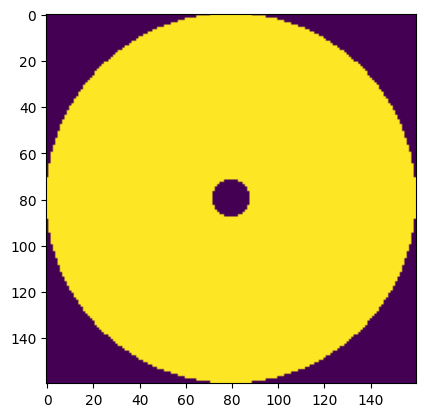

In [5]:
from OOPAO.Telescope import Telescope


sensing_wavelength  = lgsAst.src[0].wavelength           # sensing wavelength of the WFS, read from the ngs object
n_subaperture       = config_vars["nSubaperture"]        # number of subaperture across the diameter
diameter            = config_vars["diameter"]            # diameter of the support of the phase screens in [m]
resolution          = config_vars["resolution"]          # resolution of the phase screens in pixels
obs_ratio           = config_vars["centralObstruction"]  # central obstruction in fraction of the telescope diameter
sampling_time       = config_vars["samplingTime"]        # sampling time of the AO loop in [s]
fieldOfViewInArcsec = config_vars["fieldOfViewInArcsec"] # field of view of the telescope (arcsec)


tel = Telescope(diameter          = diameter,
               resolution         = resolution,
               centralObstruction = obs_ratio,
               samplingTime       = sampling_time,
               fov                = fieldOfViewInArcsec)

plt.imshow(tel.pupil)

## Atmosphere Object

In [6]:
from OOPAO.Atmosphere import Atmosphere

r0 = config_vars["r0"]
L0 = config_vars["L0"]

fractionnalR0 = config_vars["fractionnalR0"]
windSpeed = config_vars["windSpeed"]
windDirection = config_vars["windDirection"]
altitude = config_vars["altitude"]



atm = Atmosphere(telescope      = tel,
                 src            = lgsAst,
                 r0             = r0,
                 L0             = L0,
                 fractionalR0   = fractionnalR0,
                 altitude       = altitude,
                 windDirection  = windDirection,
                 windSpeed      = windSpeed)


atm.initializeAtmosphere(telescope=tel)


Creation of layer1/3 ...
-> Computing the initial phase screen...
initial phase screen : 0.010606050491333008 s
ZZt.. : 1.1748278141021729 s
ZXt.. : 0.3460574150085449 s
XXt.. : 0.1333465576171875 s
Done!
Creation of layer2/3 ...
-> Computing the initial phase screen...
initial phase screen : 0.017557859420776367 s
ZZt.. : 2.4382762908935547 s
ZXt.. : 0.3484821319580078 s
XXt.. : 0.14540743827819824 s
Done!
Creation of layer3/3 ...
-> Computing the initial phase screen...
initial phase screen : 0.024866342544555664 s
ZZt.. : 2.7519545555114746 s
ZXt.. : 0.4262657165527344 s
XXt.. : 0.2602055072784424 s
Done!
Updating the Atmosphere covariance matrices...

------------------------ Atmosphere -------------------------
 Layer | Direction | Speed | Altitude | Frac Cn² | Diameter |
       |    [°]    | [m/s] |   [m]    |   [%]    |   [m]    |
   1   |     0     |  5.0  |  0e+00   |    50    |  8.200   |
   2   |    30     | 15.0  |  5e+03   |    30    |  8.700   |
   3   |    70     | 25.0 

For now, the first propagation must pass through the atmosphere.

Since the light has not yet reached the telescope, the OPD does not conform to the pupil shape at this stage.

NGS(Na) ~~> atmosphere
NGS(Na) ~~> atmosphere
NGS(Na) ~~> atmosphere
NGS(Na) ~~> atmosphere


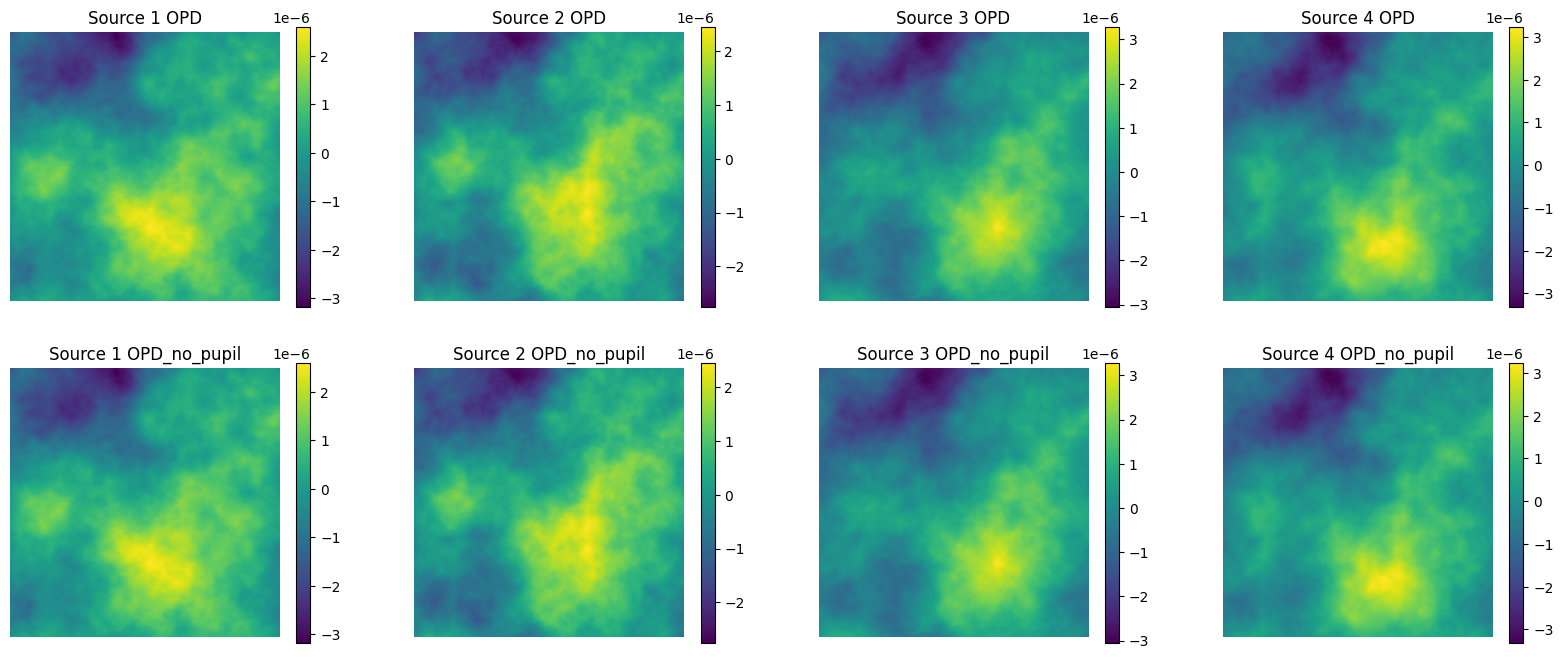

In [7]:
lgsAst**atm

lgsAst.print_optical_path()

fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))


for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i+1} OPD')
    fig.colorbar(im, ax=axes[0, i])

    im = axes[1, i].imshow(lgsAst.OPD_no_pupil[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Source {i+1} OPD_no_pupil')
    fig.colorbar(im, ax=axes[1, i])


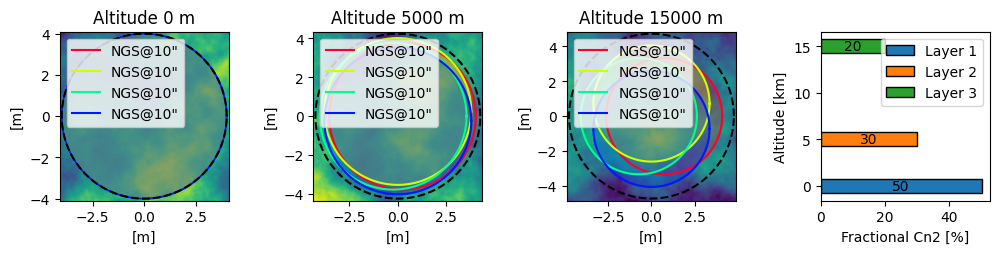

In [8]:
atm.display_atm_layers()

Once the light has propagated through the telescope, the OPD conforms to the pupil geometry.

NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope
NGS(Na) ~~> atmosphere ~~> telescope


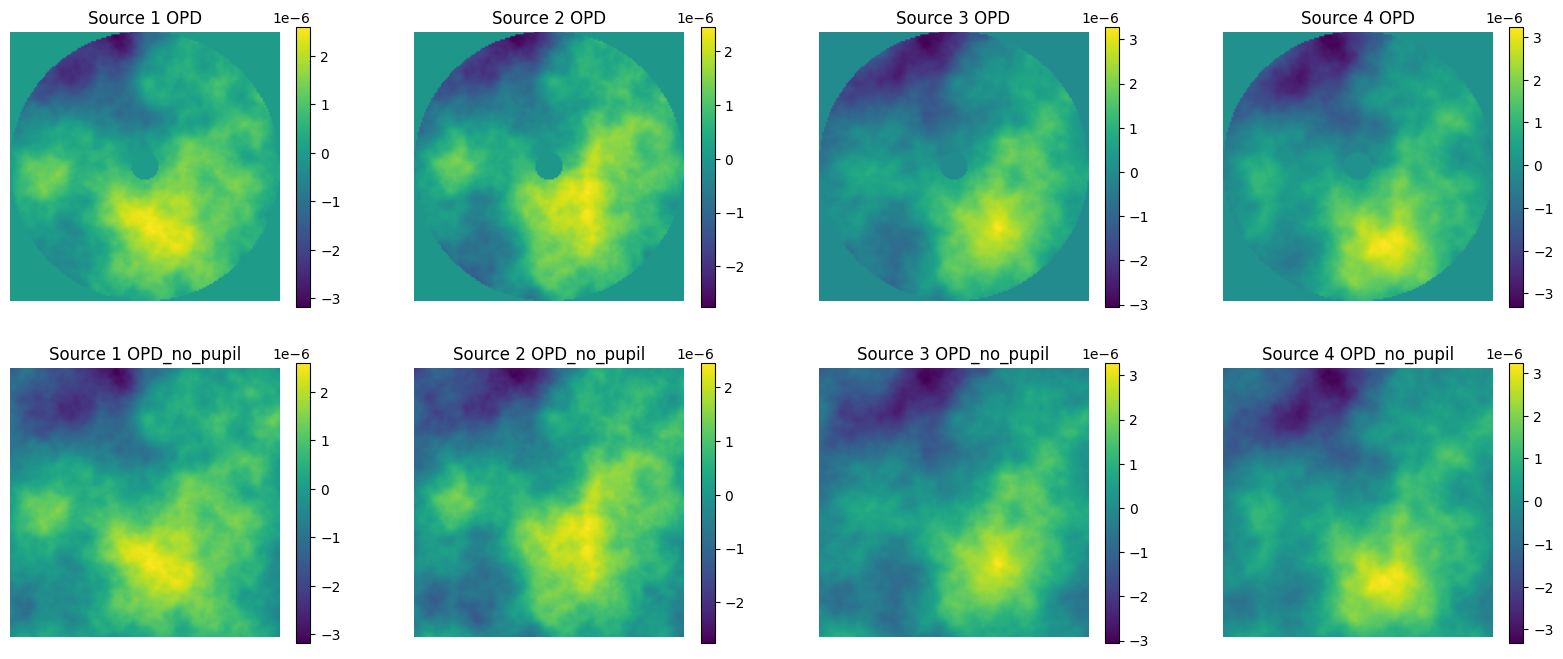

In [9]:
lgsAst*tel

lgsAst.print_optical_path()

fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i+1} OPD')
    fig.colorbar(im, ax=axes[0, i])

    im = axes[1, i].imshow(lgsAst.OPD_no_pupil[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Source {i+1} OPD_no_pupil')
    fig.colorbar(im, ax=axes[1, i])


## ShackHartmann Object

No user-input pixel scale - using shannon_sampling input value:2 pixel(s) per spot FWHM
-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   160   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------

Selecting valid subapertures based on flux considerations..
Acquiring reference slopes..
updating the flux of the SHWFS object
Done!
Recalibrating the slopes units
Acquiring reference slopes..
Done!
Done

------- Shack-Hartmann WFS --------
Subapertures [lenslets]  |   20    
Subaperture Pitch [m]    |  0.40   
Subaperture FoV [arcsec] |  1.21   
Pixel Scale [arcsec]     |  0.152  
Valid Subapertures       |   664   
Spot Sampling [pix]      |  2.00   
Geometric WFS            |  False  
----------------------

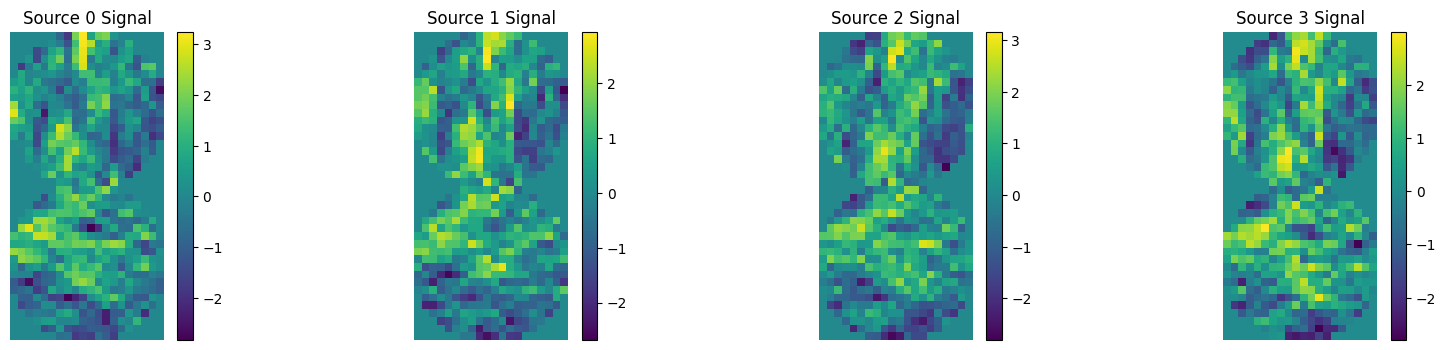

In [10]:
from OOPAO.ShackHartmann import ShackHartmann

shwfs = ShackHartmann(telescope          = tel,
                      nSubap             = n_subaperture,
                      lightRatio         = 0.1,
                      is_geometric       = False,
                      shannon_sampling   = True,
                      threshold_cog      = 0.01)


shwfs_geom = ShackHartmann(telescope     = tel,
                    nSubap             = n_subaperture,
                    lightRatio         = 0.1,
                    is_geometric       = True,
                    shannon_sampling   = True,
                    threshold_cog      = 0.01)


lgsAst**atm*tel*shwfs

lgsAst.print_optical_path()

fig, axes = plt.subplots(1, n_lgs, figsize=(20, 4))

for i in range(n_lgs):
    im = axes[i].imshow(shwfs.signal_2D[i])
    axes[i].axis('off')
    axes[i].set_title(f'Source {i} Signal')
    fig.colorbar(im, ax=axes[i], fraction=0.046, pad=0.04)


## Deformable Mirror Object

In [11]:
from OOPAO.DeformableMirror import DeformableMirror


mechanical_coupling = config_vars['mechanicalCoupling']

# Get the valid actuators from the valid subapertures
valid_actuator_mask = shwfs.get_valid_actuators()
X, Y = tomoAO.tools.tomography_tools.meshgrid(config_vars['nActuator'], tel.D, 
                                              offset_x=0.0, offset_y=0.0, 
                                              stretch_x=1, stretch_y=1)

valid_actuator_coordinates = np.array([X[valid_actuator_mask], Y[valid_actuator_mask]]).T


dm = DeformableMirror(telescope    = tel,
                      coordinates  = valid_actuator_coordinates,
                      nSubap       = n_subaperture, # by default n_subaperture+1 actuators are considered (Fried Geometry)
                      mechCoupling = mechanical_coupling)


dm.unfiltered_act_mask = valid_actuator_mask.copy()


Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   373   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistration ================
Rotation [°]             |  0.000  
Shift X [m]              |0.000e+00
Shift Y [m]              |0.000e+00
Anamorphosis angle [°]   |  0.000  
Tangential scaling [%]   |  0.000  
Radial scaling [%]       |  0.000  
-----------------------------------



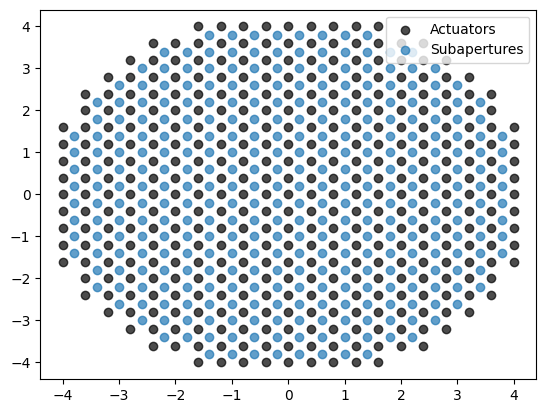

In [12]:
valid_subapertures = np.pad(shwfs.valid_subapertures,
            pad_width=(0,1),
            mode='constant',
            constant_values=0)

valid_subapertures_coordinates = np.array([X[valid_subapertures], 
                                           Y[valid_subapertures]]).T

plt.scatter(dm.coordinates[:, 0], dm.coordinates[:, 1], 
            label="Actuators", c="black", alpha=0.7)
plt.scatter(valid_subapertures_coordinates[:, 0]+0.2, valid_subapertures_coordinates[:, 1]+0.2,
             label="Subapertures", alpha=0.7)
plt.legend(loc="upper right")


NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror


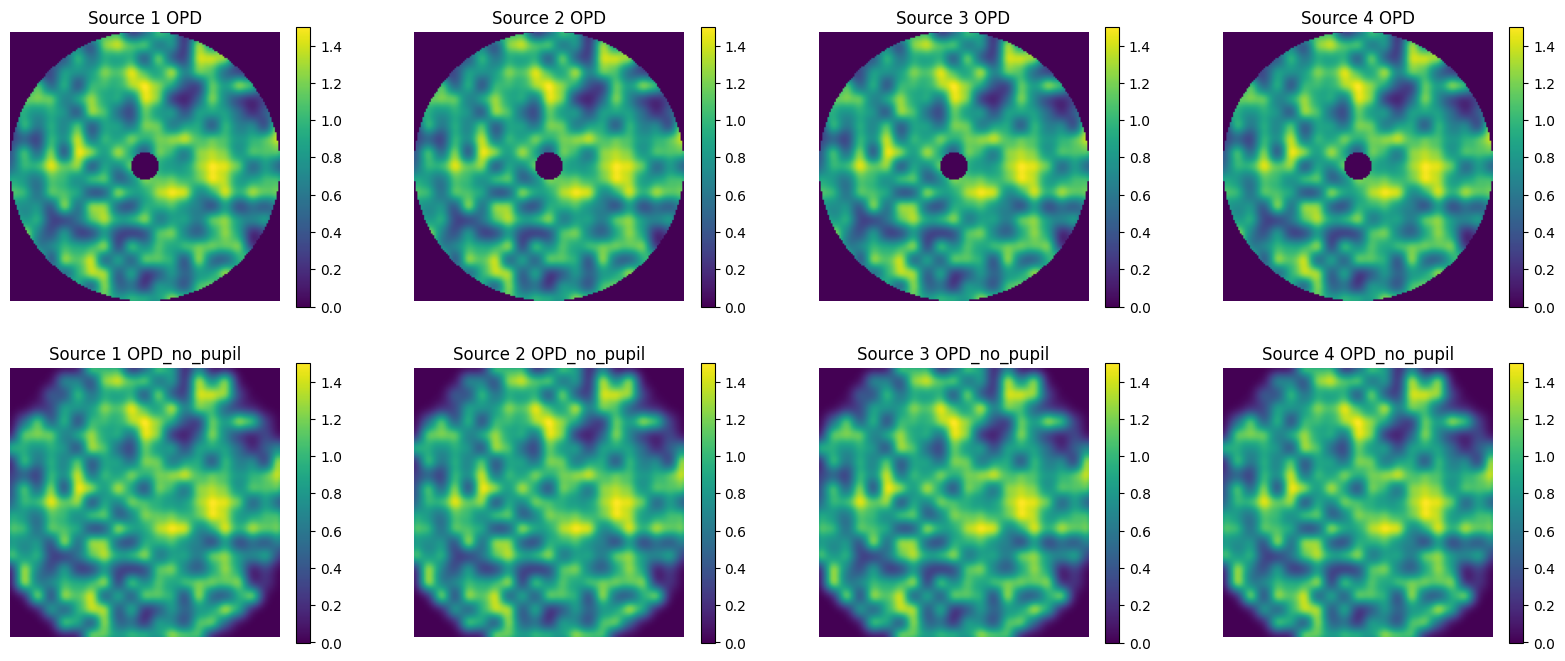

In [13]:
dm.coefs = np.random.rand(dm.nValidAct)

lgsAst**atm*tel*dm

lgsAst.print_optical_path()

fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i+1} OPD')
    fig.colorbar(im, ax=axes[0, i])

    im = axes[1, i].imshow(lgsAst.OPD_no_pupil[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Source {i+1} OPD_no_pupil')
    fig.colorbar(im, ax=axes[1, i])

NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror
NGS(Na) ~~> atmosphere ~~> telescope ~~> deformableMirror


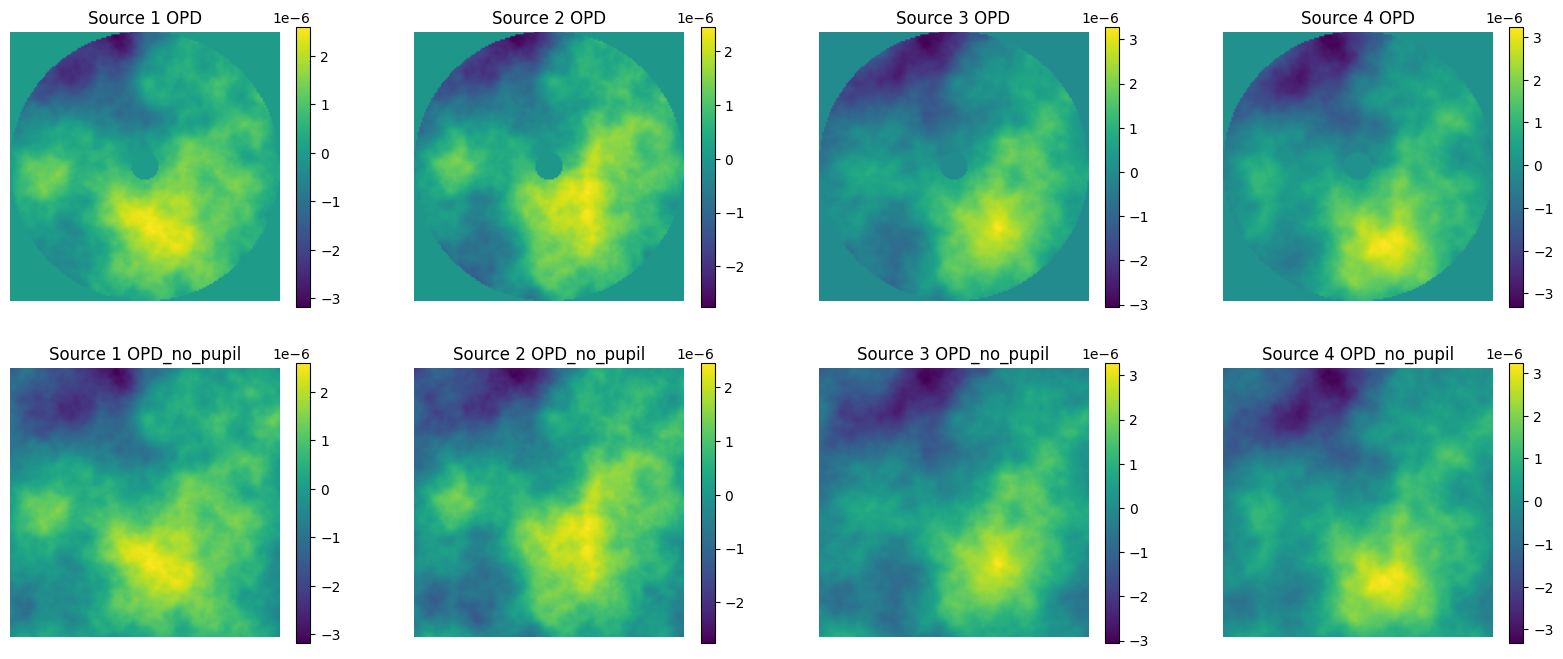

In [14]:
dm.coefs = 0

lgsAst**atm*tel*dm

lgsAst.print_optical_path()

fig, axes = plt.subplots(2, n_lgs, figsize=(20, 8))

for i in range(n_lgs):
    im = axes[0, i].imshow(lgsAst.OPD[i])
    axes[0, i].axis('off')
    axes[0, i].set_title(f'Source {i+1} OPD')
    fig.colorbar(im, ax=axes[0, i])

    im = axes[1, i].imshow(lgsAst.OPD_no_pupil[i])
    axes[1, i].axis('off')
    axes[1, i].set_title(f'Source {i+1} OPD_no_pupil')
    fig.colorbar(im, ax=axes[1, i])

### AO System Object (tomoAO)
Used to build the tomographic reconstructor

In [15]:
aoSys = tomoAO.Simulation.AOSystem(config_vars, 
                                   tel=tel, 
                                   lgsAst=lgsAst, 
                                   dm=dm, 
                                   atm=atm, 
                                   wfs=shwfs)


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 5.9e-07 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 9.0e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 2.2e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 1.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------

Coordinates loaded...
Generating a Deformable Mirror: 
Computing the 2D zonal modes...

-------- Deformable mirror --------
Controlled Actuators     |   373   
M4                       |  False  
Pitch [m]                |  0.40   
Mechnical coupling [%]   |   15    
== Misregistra

### Tomographic Reconstructor Object (tomoAO)


In [16]:
from tomoAO.Reconstruction.reconClassType import tomoReconstructor

rec = tomoReconstructor(aoSys=aoSys, alpha=10, os=2)

reconstructor = rec.reconstructor.copy()

atm.r0 = 0.16



Updating the Atmosphere covariance matrices...
GPU not available, using CPU
Updating the Atmosphere covariance matrices...


### Loop

-------------Detector--------------
Sensor type              |   CCD   
Resolution [px]          |   640   
Gain                     |    1    
Quantum efficiency [%]   |   100   
Binning                  |   1x1   
Dark current [e-/px/s]   |  0.00   
Photon noise             |  False  
Bkg noise [e-]           |  False  
Readout noise [e-/px]    |   0.0   
-----------------------------------


------------- Source --------------
Source                   |   NGS   
Wavelength [m]           | 1.7e-06 
Zenith [arcsec]          |  0.00   
Azimuth [°]              |  0.00   
Altitude [m]             |   inf   
Magnitude                |  0.00   
Flux [photon/m²/s]       | 2.9e+09 
Coordinates [arcsec,deg] | [0,0]
-----------------------------------



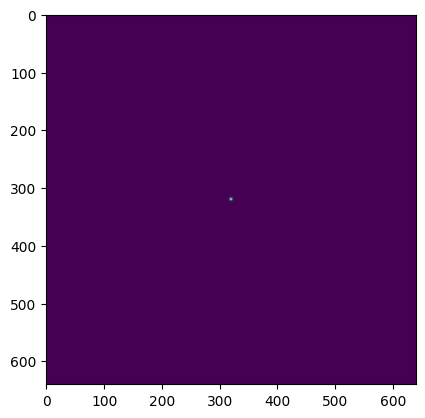

Running open loop with geometric sensor


In [17]:
from OOPAO.Detector import Detector
SciSrc_cam = Detector(tel.resolution*4)
SciSrc_cam.psf_sampling = 4
SciSrc_cam.integrationTime = tel.samplingTime*1


# Define a scientific source:
SciSrc = Source(optBand='H', magnitude=0)

dm.coefs = 0      # initialize DM commands

# initialize DM commands
SciSrc**atm*tel*dm*SciSrc_cam


nLoop = config_vars["nLoop"]

# allocate memory to save data
SR                      = np.zeros(nLoop)
total                   = np.zeros(nLoop)
residual                = np.zeros(nLoop)
wfsSignal               = np.arange(0,shwfs.nSignal*n_lgs)*0

# loop parameters
gainCL                  = config_vars["gainCL"]




atm.generateNewPhaseScreen(10)
# Save reference frame 
SciSrc**tel*dm*SciSrc_cam
plt.imshow(SciSrc_cam.frame)
plt.show()
SciSrc_cam.reference_frame = SciSrc_cam.frame.copy()



from tqdm import tqdm

if config_vars["loop_mode"] == 'closed':
    calib_src = Source('Na', 0)

    calib_src**atm
    dm_eye = np.eye(dm.nValidAct)
    imat = np.zeros((shwfs_geom.nValidSubaperture*2, dm.nValidAct)) 
    for i_act in tqdm(range(dm.nValidAct)):
        dm.coefs = dm_eye[:, i_act]*calib_src.wavelength/2/np.pi
        calib_src**tel*dm*shwfs_geom
        
        wfsSignal = np.hstack(shwfs_geom.signal)
        
        if rec.indexation == "xyxy":
            wfsSignal_xyxy = np.zeros(wfsSignal.shape)
            wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
            wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
            wfsSignal = wfsSignal_xyxy.copy()
            
        
        imat[:, i_act] = wfsSignal

    imat = imat*2*np.pi/calib_src.wavelength    
    imat = np.vstack([imat]*n_lgs)


print(f"Running {config_vars['loop_mode']} loop with {'geometric' if config_vars['wfs_type'] == 'g' else 'diffractive'} sensor")


In [18]:
for i in range(nLoop):

    atm.update()
    SciSrc**atm*tel

    total[i]=np.std(SciSrc.OPD[np.where(tel.pupil>0)])*1e9


    if config_vars["loop_mode"] == 'open':
        lgsAst**atm*tel*shwfs_geom*dm
        wfsSignal = np.hstack(shwfs_geom.signal)
        
    elif config_vars["loop_mode"] == 'closed':

        if config_vars["wfs_type"] == 'g':
            lgsAst**atm*tel*dm*shwfs_geom
            wfsSignal = np.hstack(shwfs_geom.signal)

        elif config_vars["wfs_type"] == 'd':
            lgsAst**atm*tel*dm*shwfs
            wfsSignal = np.hstack(shwfs.signal)
    

    if rec.indexation == "xyxy":

        wfsSignal_xyxy = np.zeros(wfsSignal.shape)
        wfsSignal_xyxy[::2] = wfsSignal[:int(len(wfsSignal)/2)]
        wfsSignal_xyxy[1::2] = wfsSignal[int(len(wfsSignal)/2):]
        wfsSignal = wfsSignal_xyxy.copy()


    if config_vars["loop_mode"] == 'closed':
        wfsSignal = wfsSignal-imat@dm.coefs
    

    SciSrc**atm*tel*dm*SciSrc_cam

    dm.coefs = (1-gainCL)*dm.coefs - gainCL * (reconstructor@wfsSignal)

    SR[i]=np.exp(-np.var(SciSrc.phase[np.where(tel.pupil==1)]))
    residual[i] = np.sqrt(np.var(SciSrc.OPD[np.where(SciSrc.mask==1)])) * 1e9

    
    print('Loop'+str(i)+'/'+str(nLoop)+' AO residual: '+str(residual[i])+' nm')


Loop0/200 AO residual: 905.865153890678 nm
Loop1/200 AO residual: 199.99568141226592 nm
Loop2/200 AO residual: 103.58080527050363 nm
Loop3/200 AO residual: 99.39905229128289 nm
Loop4/200 AO residual: 99.11988851019439 nm
Loop5/200 AO residual: 99.22958155741587 nm
Loop6/200 AO residual: 99.40600288479258 nm
Loop7/200 AO residual: 99.48596636110132 nm
Loop8/200 AO residual: 99.20508471435683 nm
Loop9/200 AO residual: 99.0983494641777 nm
Loop10/200 AO residual: 99.31435960213051 nm
Loop11/200 AO residual: 99.11099879436442 nm
Loop12/200 AO residual: 98.80748562880393 nm
Loop13/200 AO residual: 98.61208413790851 nm
Loop14/200 AO residual: 99.33684238910244 nm
Loop15/200 AO residual: 99.93111646995834 nm
Loop16/200 AO residual: 101.11783506917146 nm
Loop17/200 AO residual: 102.24424493274834 nm
Loop18/200 AO residual: 103.62064540101123 nm
Loop19/200 AO residual: 104.04865169809649 nm
Loop20/200 AO residual: 104.34071343372959 nm
Loop21/200 AO residual: 104.59123762470658 nm
Loop22/200 AO 

## Results

In [19]:
print(f"AO res {round(np.mean(residual[10:]), 2)} nm")
print(f"Marechal SR: {round(np.mean(SR[10:])*100, 2)}%")
print(f"max(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame)*100, 2)}%")


AO res 104.62 nm
Marechal SR: 85.37%
max(i_ao)/max(i_dl) SR: 93.55%


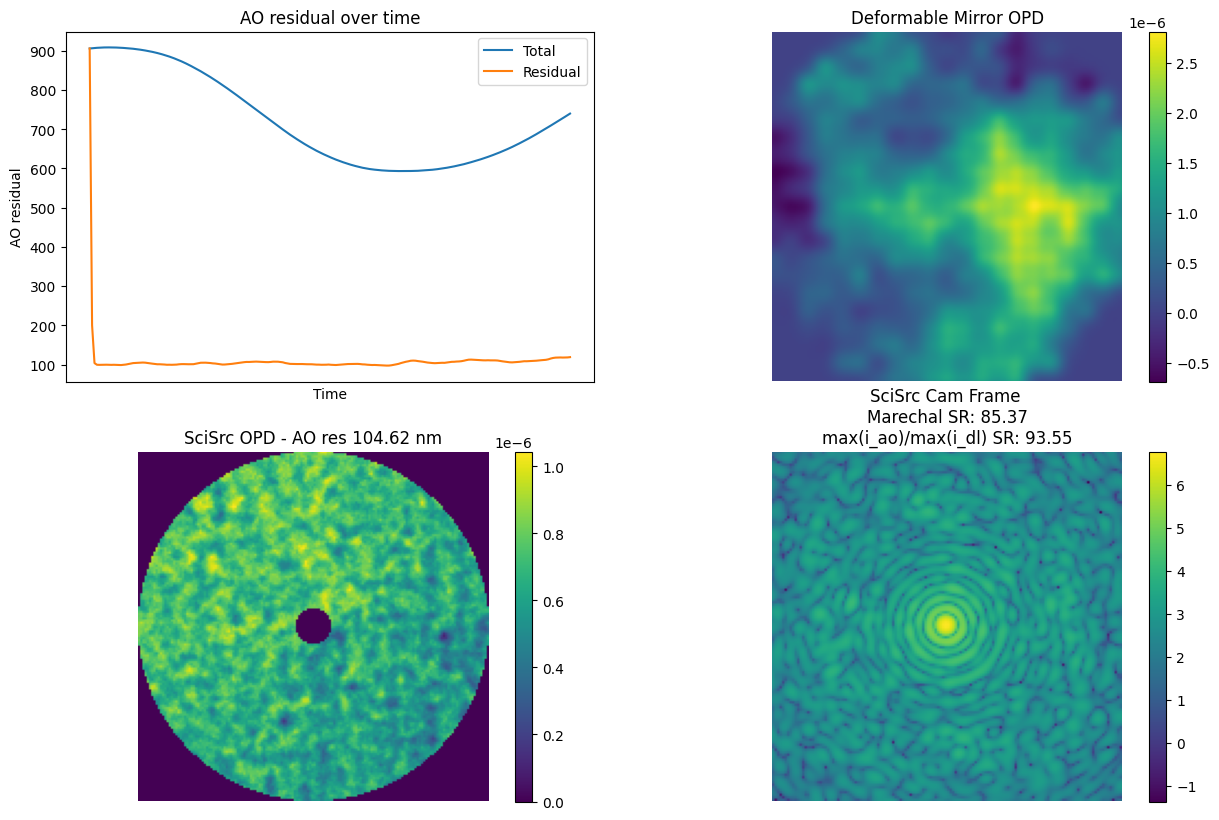

In [20]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0, 0].plot(total, label="Total")
axes[0, 0].plot(residual, label="Residual")
axes[0, 0].set_xlabel("Time")
axes[0, 0].set_ylabel("AO residual")
axes[0, 0].set_title("AO residual over time")
axes[0, 0].legend()
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)


im = axes[0, 1].imshow(dm.OPD)
axes[0, 1].axis('off')
axes[0, 1].set_title(f'Deformable Mirror OPD')
fig.colorbar(im, ax=axes[0, 1])


im = axes[1, 0].imshow(SciSrc.OPD)
axes[1, 0].axis('off')
axes[1, 0].set_title(f"SciSrc OPD - AO res {round(np.mean(residual[10:]), 2)} nm")
fig.colorbar(im, ax=axes[1, 0])


# set back the reflectivity 1
tel.pupilReflectivity = tel.pupil.astype(float)

SciSrc**atm*tel*dm 

# compute PSF method
zeroPaddingFactor = 6
tel.computePSF(zeroPaddingFactor=zeroPaddingFactor, detector=SciSrc_cam)

# get current pixel scale
size_pixel_arcsec = 206265*(tel.src.wavelength/tel.D)/zeroPaddingFactor
N                 = 250
normalized_PSF    = tel.PSF[N:-N,N:-N]# crop to zoom on the center
fov               = normalized_PSF.shape[0]*size_pixel_arcsec # get the corresponding fov


im = axes[1, 1].imshow(np.log10(normalized_PSF),extent=[-fov/2,fov/2,-fov/2,fov/2])
axes[1, 1].axis('off')
axes[1, 1].set_title(f"SciSrc Cam Frame \nMarechal SR: {round(np.mean(SR[10:])*100, 2)}\nmax(i_ao)/max(i_dl) SR: {round(np.max(SciSrc_cam.frame)/np.max(SciSrc_cam.reference_frame)*100, 2)}")
fig.colorbar(im, ax=axes[1, 1])



In [ ]:
if config_vars["wfs_type"] == 'd':
    plt.imshow(np.vstack((np.hstack((shwfs.frames[0], shwfs.frames[0])), np.hstack((shwfs.frames[2], shwfs.frames[3])))))
    plt.axis('off')
    plt.title('SHWFS Frames')
    plt.colorbar()


: 